In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
# Load data
df = pd.read_csv('/Users/christopheryang/Desktop/clean data for analysis/cleanbackup.csv')

# Define features and target
X = df.drop(['IgA ASCA EU','IgG ASCA EU','OmpC. EU','Cbir1 EU','ANCA EU','serum_id', 'participant_id', 'sample_name'], axis=1)  # drop target columns
y = df['OmpC. EU']  # or another inflammation marker

In [16]:
# print(df.columns.tolist())

In [17]:
X.head()

,Phocaeicola_vulgatus,Faecalibacterium_prausnitzii,Bacteroides_uniformis,Prevotella_copri_clade_A,Bacteroides_stercoris,Phocaeicola_dorei,Bacteroides_ovatus,Bacteroides_fragilis,Eubacterium_rectale,Alistipes_putredinis,...,Gemmiger_formicilis,GGB58485_SGB80143,age,sex_Female,sex_Male,race_American Indian or Alaska Native,race_Black or African American,race_More than one race,race_Other,race_White
0,0.466296,0.046730,0.000657,0.000000,0.000000,0.012400,0.000075,0.000000,0.057284,0.000549,...,0.000000,0.000000,30,0,1,0,0,0,0,1
1,0.201702,0.203203,0.101080,0.000000,0.093508,0.000024,0.000318,0.004624,0.011832,0.066698,...,0.000106,0.000047,40,1,0,0,0,0,0,1
2,0.277953,0.123363,0.184297,0.002813,0.000000,0.078403,0.030045,0.000000,0.011108,0.000041,...,0.000000,0.000000,7,1,0,0,1,0,0,0
3,0.216124,0.107264,0.080507,0.000051,0.000360,0.080686,0.017426,0.000000,0.030178,0.110285,...,0.000000,0.000000,7,1,0,0,1,0,0,0
4,0.270831,0.081354,0.109214,0.000000,0.000000,0.062907,0.029034,0.000000,0.014831,0.104656,...,0.000000,0.000000,7,1,0,0,1,0,0,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestRegressor
# Train a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import numpy as np

print('R2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('Explained Variance:', explained_variance_score(y_test, y_pred))

R2: 0.6556811421435058
RMSE: 2.6984324737013616
MAE: 1.2766386554621854
Explained Variance: 0.6557493635465084


Cross validation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize your model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation using R2 as the scoring metric
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R2 scores:", cv_scores)
print("Mean R2:", np.mean(cv_scores))
print("Std R2:", np.std(cv_scores))

Cross-validated R2 scores: [-0.00671056  0.2696186   0.5122637  -0.20619003 -1.87373145]
Mean R2: -0.2609499488708005
Std R2: 0.8423850454405127


In [23]:
import pickle

# Save the model to a file
with open('OmpCmodel.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [24]:
# import matplotlib.pyplot as plt

# metrics = {
#     'R2': r2_score(y_test, y_pred),
#     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
#     'MAE': mean_absolute_error(y_test, y_pred),
#     'Explained Variance': explained_variance_score(y_test, y_pred)
# }

# plt.figure(figsize=(8,4))
# plt.bar(metrics.keys(), metrics.values(), color=['#7C0A02', '#FF3333', '#222222', '#888888'])
# plt.title('Regression Metrics of IgG ASCA EU')
# plt.ylabel('Score / Error')
# plt.tight_layout()
# plt.savefig('regression_metrics.png')
# plt.show()

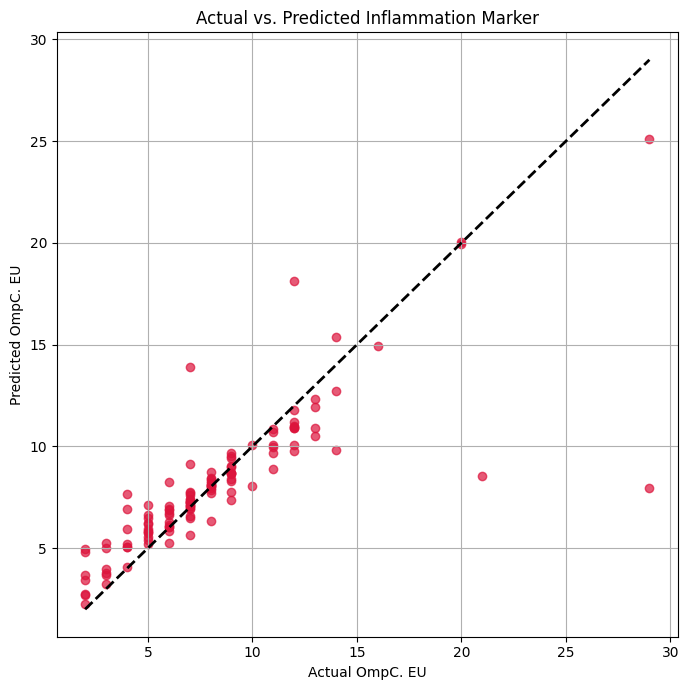

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.7, color='crimson')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual OmpC. EU')
plt.ylabel('Predicted OmpC. EU')
plt.title('Actual vs. Predicted Inflammation Marker')
plt.grid(True)
plt.tight_layout()
# plt.savefig('actual_vs_predicted.png')  # Save the plot as a file
plt.show()

Top 10 Most Important Features for OmpC Prediction:
 1. GGB9453_SGB14844                    0.0949
 2. Flavonifractor_plautii              0.0912
 3. Escherichia_coli                    0.0871
 4. Bacteroides_stercoris               0.0636
 5. age                                 0.0579
 6. GGB1266_SGB1699                     0.0365
 7. Hungatella_hathewayi                0.0314
 8. Phocaeicola_massiliensis            0.0267
 9. Lachnospira_pectinoschiza           0.0218
10. Dialister_invisus                   0.0214


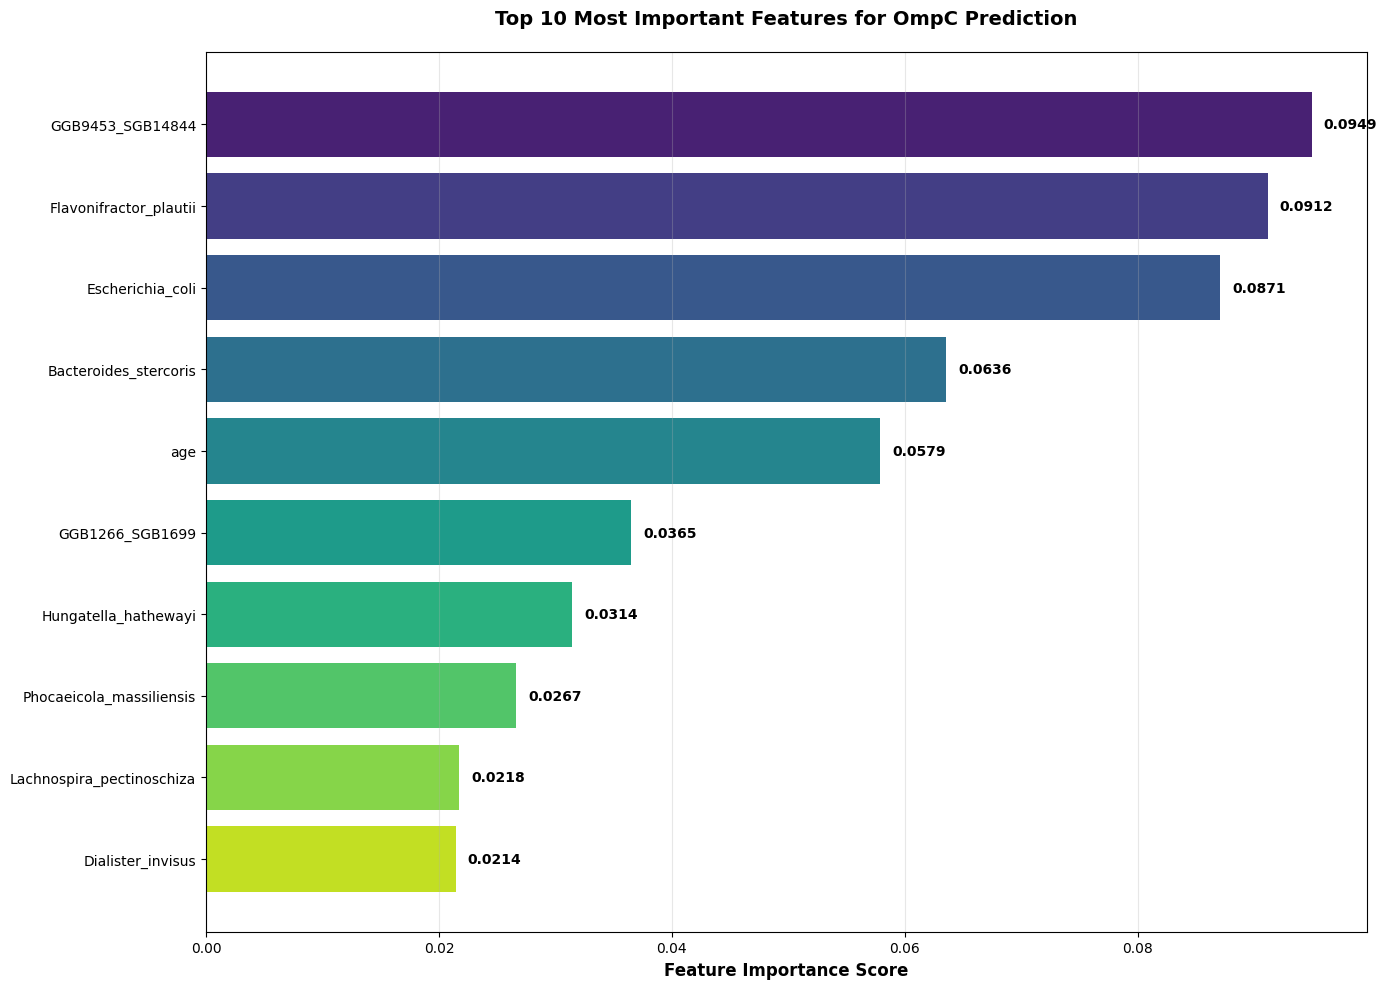


Summary Statistics:
Total number of features: 158
Mean importance: 0.0063
Standard deviation: 0.0146
Top feature importance: 0.0949
Bottom feature importance: 0.0000

Features with importance > 0.01 (1%): 18
 1. GGB9453_SGB14844                    0.0949
 2. Flavonifractor_plautii              0.0912
 3. Escherichia_coli                    0.0871
 4. Bacteroides_stercoris               0.0636
 5. age                                 0.0579
 6. GGB1266_SGB1699                     0.0365
 7. Hungatella_hathewayi                0.0314
 8. Phocaeicola_massiliensis            0.0267
 9. Lachnospira_pectinoschiza           0.0218
10. Dialister_invisus                   0.0214
11. Fusicatenibacter_saccharivorans     0.0192
12. Clostridium_fessum                  0.0175
13. Odoribacter_splanchnicus            0.0164
14. Ruminococcus_lactaris               0.0153
15. Lacrimispora_celerecrescens         0.0153
16. Eubacterium_siraeum                 0.0134
17. Butyrivibrio_crossotus             

In [26]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
with open('OmpCmodel.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Load the data to get feature names
df = pd.read_csv('cleanbackup.csv')

# Define features (same as in your training)
X = df.drop(['IgA ASCA EU','IgG ASCA EU','OmpC. EU','Cbir1 EU','ANCA EU','serum_id', 'participant_id', 'sample_name'], axis=1)

# Get feature importance from the trained model
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display top 10 features
print("Top 10 Most Important Features for OmpC Prediction:")
print("=" * 60)
for i, (_, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<35} {row['Importance']:.4f}")

# Create a bar plot of top 10 features
plt.figure(figsize=(14, 10))
top_10_features = feature_importance_df.head(10)

# Create horizontal bar plot
bars = plt.barh(range(len(top_10_features)), top_10_features['Importance'], 
                color=sns.color_palette("viridis", len(top_10_features)))

# Add value labels on the bars
for i, (bar, importance) in enumerate(zip(bars, top_10_features['Importance'])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{importance:.4f}', ha='left', va='center', fontweight='bold')

plt.yticks(range(len(top_10_features)), top_10_features['Feature'])
plt.xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Important Features for OmpC Prediction', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  # Display most important at the top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Save the plot
# plt.savefig('top_10_features_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Display summary statistics
print(f"\nSummary Statistics:")
print("=" * 60)
print(f"Total number of features: {len(feature_importance_df)}")
print(f"Mean importance: {feature_importance_df['Importance'].mean():.4f}")
print(f"Standard deviation: {feature_importance_df['Importance'].std():.4f}")
print(f"Top feature importance: {feature_importance_df['Importance'].max():.4f}")
print(f"Bottom feature importance: {feature_importance_df['Importance'].min():.4f}")

# Show features with importance > 0.01 (1%)
significant_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]
print(f"\nFeatures with importance > 0.01 (1%): {len(significant_features)}")
print("=" * 60)
for i, (_, row) in enumerate(significant_features.iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<35} {row['Importance']:.4f}")

# Save the full feature importance to CSV
# feature_importance_df.to_csv('feature_importance_ranking.csv', index=False)
print(f"\nFull feature importance ranking saved to 'feature_importance_ranking.csv'")